In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [34]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
from sqlalchemy import create_engine

In [36]:
# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

most_current_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_current_date = str(most_current_date)[2:-3]

print(most_current_date)

2017-08-23


In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

meas_columns = inspector.get_columns('measurement')
for column in meas_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Perform a query to retrieve the data and precipitation scores

meas_query = engine.execute('SELECT date , prcp FROM measurement')
# meas_query

# Save the query results as a Pandas DataFrame and set the index to the date column

   ### trying mask ###
measurement_df = pd.DataFrame(meas_query)
measurement_df = measurement_df.rename(columns={0: 'date', 1: 'prcp'})
measurement_df['date'] =  pd.to_datetime(measurement_df['date'], format='%Y-%m-%d')
measurement_df.head()
mask = (measurement_df['date'] > '2016-08-23') & (measurement_df['date'] <= '2017-08-23')
measurement_df_1year = measurement_df.loc[mask]
measurement_df_1year = measurement_df_1year.set_index(['date'])

# Sort the dataframe by date
measurement_df_1year.sort_index()
measurement_df_1year.head()
# measurement_df_1year.count()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [41]:
# Calculate the date 1 year ago from today
   ### data provided does not allow for this ###
lastDate = session.query(func.Max(Measurement.date)).all()[0][0]
prevYear = dt.datetime.strptime(lastDate,'%Y-%m-%d') - dt.timedelta(366)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prevYear).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results).set_index('date')
df.head()

#    ### trying mask ###
# measurement_df = pd.DataFrame(meas_query)
# measurement_df = measurement_df.rename(columns={0: 'date', 1: 'prcp'})
# measurement_df['date'] =  pd.to_datetime(measurement_df['date'], format='%Y-%m-%d')
# measurement_df.head()
# mask = (measurement_df['date'] > '2016-08-23') & (measurement_df['date'] <= '2017-08-23')
# measurement_df_1year = measurement_df.loc[mask]
# measurement_df_1year = measurement_df_1year.set_index(['date'])

# # Sort the dataframe by date
# measurement_df_1year.sort_index()
# measurement_df_1year.head()
# measurement_df_1year.count()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [14]:

# pd.DataFrame.plot()
#Plotting a simple bar graph to represent the number of reviews per rating

df.Measurements = df.Measurements.astype('float64')
df.Rating = round(df.Rating,0)
df.groupby('Rating').mean().sort_values('Reviews').plot(kind='bar',color = ['orange'])
plt.title('Reviews per Rating')
plt.ylabel('Reviews')
plt.savefig('Reviews_per_Rating.png')

AttributeError: 'DataFrame' object has no attribute 'Measurements'

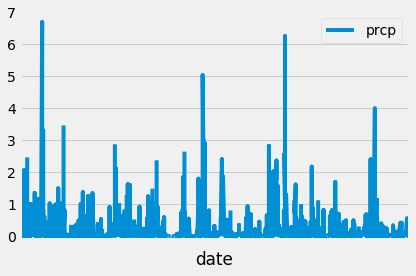

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data

measurement_df_1year.plot()
plt.xticks([])
plt.tight_layout()
plt.show()

# Rotate the xticks for the dates

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

In [16]:
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Statistical analysis
from scipy import stats
from scipy import mean

In [22]:
# Design a query to show how many stations are available in this dataset?
# Perform a query to retrieve the data and precipitation scores

stat_query = engine.execute('SELECT date , prcp FROM measurement')
# meas_query

# Save the query results as a Pandas DataFrame and set the index to the date column

   ### trying mask ###
measurement_df = pd.DataFrame(meas_query)
measurement_df = measurement_df.rename(columns={0: 'date', 1: 'prcp'})
measurement_df['date'] =  pd.to_datetime(measurement_df['date'], format='%Y-%m-%d')
measurement_df.head()
mask = (measurement_df['date'] > '2016-08-23') & (measurement_df['date'] <= '2017-08-23')
measurement_df_1year = measurement_df.loc[mask]
measurement_df_1year = measurement_df_1year.set_index(['date'])

# Sort the dataframe by date
measurement_df_1year.sort_index()
measurement_df_1year.head()
# measurement_df_1year.count()

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
